In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [3]:
train = pd.read_csv('train.csv')
train.head(5)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [4]:
test = pd.read_csv('test.csv')
test.head(5)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category
0,01/04/2017,2,5814,NaN,810,18APR17:00:00:00,153.00,POS
1,01/03/2017,2,5812,NaN,810,10MAR17:00:00:00,388.08,POS
2,01/02/2017,2,5691,NaN,810,21FEB17:00:00:00,999.00,POS
3,01/04/2017,2,5814,NaN,810,26APR17:00:00:00,90.00,POS
4,01/04/2017,2,5814,NaN,810,08APR17:00:00:00,130.00,POS


In [5]:
train.drop('target_sum', axis=1, inplace=True)

In [6]:
test['target_flag'] = "y"

In [7]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
df = pd.concat([train, test])#[:100]

In [9]:
#new_df = df.groupby( [ "cl_id", "target_flag"] ).mean()

In [10]:
df.trx_category.value_counts()

POS               858574
DEPOSIT            43086
WD_ATM_ROS         38414
WD_ATM_PARTNER     20428
C2C_IN             15196
WD_ATM_OTHER       14117
C2C_OUT            11210
BACK_TRX            5433
CAT                 2358
CASH_ADV              73
Name: trx_category, dtype: int64

### Загружаем данные о кодах

In [11]:
codes = pd.read_excel('mcc_codes.xlsx')

In [12]:
codes.Группа.fillna("?", inplace=True)
codes.head(5)

,чисоло,Имя,Группа
0,742,Ветеринарные услуги,Контрактные услуги
1,763,Сельскохозяйственные кооперативы,Контрактные услуги
2,780,Услуги садоводства и ландшафтного дизайна,Контрактные услуги
3,1520,Генеральные подрядчики – жилое и коммерческое ...,Контрактные услуги
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",Контрактные услуги


In [13]:
codes_list = codes.Группа.value_counts().index.tolist()
codes_dict_short = dict((k,i) for i,k in enumerate(codes_list))

In [14]:
codes_dict_short


{'?': 15,
 'Авиалинии, авиакомпании': 1,
 'Автомобили и транспортные средства': 12,
 'Аренда автомобилей': 2,
 'Бизнес услуги': 6,
 'Государственные услуги': 17,
 'Коммунальные и кабельные услуги': 19,
 'Контрактные услуги': 16,
 'Личные услуги': 11,
 'Магазины одежды': 14,
 'Оптовые поставщики и производители': 5,
 'Отели и мотели': 0,
 'Поставщик услуг': 4,
 'Продажи по почте/телефону': 18,
 'Профессиональные услуги': 9,
 'Развлечения': 7,
 'Различные магазины': 3,
 'Ремонтные услуги': 13,
 'Розничные магазины': 8,
 'Транспорт': 10,
 'Членские организации': 20}

In [15]:
def set_code_val(group):
    return codes_dict_short[group]

In [16]:
codes['code_type'] = codes['Группа'].apply(set_code_val)

In [17]:
codes.drop_duplicates( subset = 'чисоло', keep = 'first', inplace = True )

In [18]:
codes.head(5)

,чисоло,Имя,Группа,code_type
0,742,Ветеринарные услуги,Контрактные услуги,16
1,763,Сельскохозяйственные кооперативы,Контрактные услуги,16
2,780,Услуги садоводства и ландшафтного дизайна,Контрактные услуги,16
3,1520,Генеральные подрядчики – жилое и коммерческое ...,Контрактные услуги,16
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",Контрактные услуги,16


In [19]:
codes_dict = {}

In [20]:
for code, code_type in zip(codes.чисоло, codes.code_type):
    codes_dict[code] = code_type

In [21]:
def set_mcc_category(mcc):
    if mcc in codes_dict:
        return codes_dict[mcc]
    
    return codes_dict_short['?']

In [22]:
df['mcc_category'] = df['MCC'].apply(set_mcc_category)

In [23]:
df.head(10)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,mcc_category
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,8
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,4
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,3
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,8
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,4
5,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,380.0,POS,0,3
6,01/10/2017,1,5814,NaN,810,10OCT17:00:00:00,378.0,POS,0,3
7,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,199.0,POS,0,3
8,01/10/2017,1,5814,NaN,810,11OCT17:00:00:00,400.0,POS,0,3
9,01/07/2017,1,5411,NaN,810,26JUL17:00:00:00,598.0,POS,0,8


In [24]:
df_short = pd.DataFrame(df, columns = ["cl_id", "target_flag", "mcc_category"])

In [25]:
df_dm = pd.get_dummies(df_short, columns= ['mcc_category'])

In [26]:
df_dm.head(2)

,cl_id,target_flag,mcc_category_0,mcc_category_1,mcc_category_2,mcc_category_3,mcc_category_4,mcc_category_5,mcc_category_6,mcc_category_7,...,mcc_category_11,mcc_category_12,mcc_category_13,mcc_category_14,mcc_category_15,mcc_category_16,mcc_category_17,mcc_category_18,mcc_category_19,mcc_category_20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_dm = df_dm.groupby( [ "cl_id", "target_flag"] ).max().reset_index()

In [28]:
df_dm.head(10)

,cl_id,target_flag,mcc_category_0,mcc_category_1,mcc_category_2,mcc_category_3,mcc_category_4,mcc_category_5,mcc_category_6,mcc_category_7,...,mcc_category_11,mcc_category_12,mcc_category_13,mcc_category_14,mcc_category_15,mcc_category_16,mcc_category_17,mcc_category_18,mcc_category_19,mcc_category_20
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,2,y,1,1,0,1,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
3,3,y,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,4,y,0,0,0,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5,5,1,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
6,6,y,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
7,7,y,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
8,8,y,1,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
9,9,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
def get_amount_sum(r):
    return r.amount.sum()

In [30]:
def get_main_currency(r):
    return(r.currency.value_counts().index.tolist()[0])

In [31]:
def get_amount_mean(r):
    return r.amount.mean()

In [32]:
def mcc_processed(r):
    return(r.mcc_category.value_counts().index.tolist()[0])

In [33]:
data_full = pd.DataFrame({
        'amount_sum' : df.groupby( [ "cl_id", "target_flag" ] ).apply(get_amount_sum),
        'main_currency' :  df.groupby( [ "cl_id", "target_flag" ] ).apply(get_main_currency),
        'amount_mean': df.groupby( [ "cl_id", "target_flag" ] )['amount'].mean(),
        #'mcc_main': df.groupby( [ "cl_id", "target_flag" ] ).apply(mcc_processed),
        
    }).reset_index()

In [34]:
data_full.head(4)


,cl_id,target_flag,amount_mean,amount_sum,main_currency
0,0,0,12876.600000,64383.00,810
1,1,0,2572.865769,267578.04,810
2,2,y,1651.847839,328717.72,810
3,3,y,2821.341354,270848.77,810


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
data_full_2 = data_full.copy()

In [37]:
del data_full_2['target_flag']
del data_full_2['cl_id']

In [38]:
scaler.fit(data_full_2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
X_train_imputed_scaled = scaler.transform(data_full_2)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=data_full_2.columns)

In [40]:
X_train_imputed_scaled

,amount_mean,amount_sum,main_currency
0,0.085018,-0.417397,-0.038392
1,-0.329823,-0.244298,-0.038392
2,-0.366904,-0.192214,-0.038392
3,-0.319819,-0.241512,-0.038392
4,-0.347236,-0.184155,-0.038392
5,-0.278498,-0.006800,-0.038392
6,-0.358890,-0.079630,-0.038392
7,-0.387942,-0.306771,-0.038392
8,-0.371695,-0.213692,-0.038392
9,0.443371,0.251275,-0.038392


In [41]:
df_dm.head(4)

,cl_id,target_flag,mcc_category_0,mcc_category_1,mcc_category_2,mcc_category_3,mcc_category_4,mcc_category_5,mcc_category_6,mcc_category_7,...,mcc_category_11,mcc_category_12,mcc_category_13,mcc_category_14,mcc_category_15,mcc_category_16,mcc_category_17,mcc_category_18,mcc_category_19,mcc_category_20
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,2,y,1,1,0,1,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
3,3,y,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [42]:
#pd.concat([X_train_imputed_scaled, df_dm], axis=1)

In [43]:
#df_dm['amount_sum'] =  df.groupby( [ "cl_id", "target_flag" ] ).apply(get_amount_sum)

In [44]:
#df_dm['main_currency'] = df.groupby( [ "cl_id", "target_flag" ] ).apply(get_main_currency)
#df_dm['amount_mean'] = df.groupby( [ "cl_id", "target_flag" ] )['amount'].mean()

In [45]:
df_dm.head(10)

,cl_id,target_flag,mcc_category_0,mcc_category_1,mcc_category_2,mcc_category_3,mcc_category_4,mcc_category_5,mcc_category_6,mcc_category_7,...,mcc_category_11,mcc_category_12,mcc_category_13,mcc_category_14,mcc_category_15,mcc_category_16,mcc_category_17,mcc_category_18,mcc_category_19,mcc_category_20
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,2,y,1,1,0,1,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
3,3,y,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,4,y,0,0,0,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5,5,1,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
6,6,y,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
7,7,y,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
8,8,y,1,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
9,9,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10217 entries, 0 to 10216
Data columns (total 23 columns):
cl_id              10217 non-null int64
target_flag        10217 non-null object
mcc_category_0     10217 non-null uint8
mcc_category_1     10217 non-null uint8
mcc_category_2     10217 non-null uint8
mcc_category_3     10217 non-null uint8
mcc_category_4     10217 non-null uint8
mcc_category_5     10217 non-null uint8
mcc_category_6     10217 non-null uint8
mcc_category_7     10217 non-null uint8
mcc_category_8     10217 non-null uint8
mcc_category_9     10217 non-null uint8
mcc_category_10    10217 non-null uint8
mcc_category_11    10217 non-null uint8
mcc_category_12    10217 non-null uint8
mcc_category_13    10217 non-null uint8
mcc_category_14    10217 non-null uint8
mcc_category_15    10217 non-null uint8
mcc_category_16    10217 non-null uint8
mcc_category_17    10217 non-null uint8
mcc_category_18    10217 non-null uint8
mcc_category_19    10217 non-null uint8
mcc_catego

In [47]:
#data_full.info(3)

In [48]:
df_dummies = pd.get_dummies(data_full, columns=['mcc_main', 'main_currency'])

ValueError: labels ['mcc_main'] not contained in axis

In [49]:
data_full.shape

(10217, 5)

In [50]:
df_dm.shape

(10217, 23)

In [51]:
#data_ = pd.concat([data_full, df_dm], axis=1)

In [52]:
#data_ = pd.merge(data_full, df_dm)

In [53]:
data_ = pd.concat([data_full_2, df_dm], axis=1)
#data_

In [54]:
X_train = data_[data_.target_flag!='y'].drop('target_flag', axis=1)
X_test = data_[data_.target_flag=='y'].drop('target_flag', axis=1)

In [55]:
Y_train = data_[data_.target_flag!='y']['target_flag'].apply(int)

In [56]:
X_train.shape[0] == Y_train.shape[0]

True

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [58]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [59]:
%%time
gridsearch.fit(X_train,Y_train)

CPU times: user 741 ms, sys: 15.3 ms, total: 756 ms
Wall time: 780 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [60]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.89537, std: 0.14080, params: {'max_depth': 1},
 mean: -14.67348, std: 5.62683, params: {'max_depth': 2},
 mean: -17.85510, std: 1.86895, params: {'max_depth': 3},
 mean: -18.61178, std: 1.97476, params: {'max_depth': 4},
 mean: -27.50066, std: 8.43499, params: {'max_depth': 7},
 mean: -27.50080, std: 8.43510, params: {'max_depth': 6},
 mean: -27.50137, std: 8.43554, params: {'max_depth': 5},
 mean: -27.56200, std: 8.48387, params: {'max_depth': 9},
 mean: -27.56898, std: 8.48954, params: {'max_depth': 8}]

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


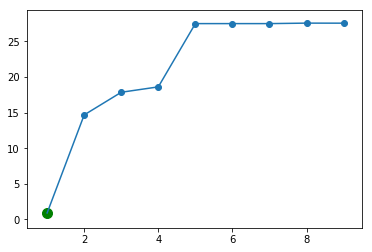

In [61]:
scores = [-x.mean_validation_score for x in gridsearch.grid_scores_]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [75]:
clf_final = DecisionTreeClassifier(max_depth=10)

In [76]:
clf_final.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
clf_final.score(X_train,Y_train)

0.8392

In [79]:
y_pred_proba = clf_final.predict_proba(X_test)
predictions = clf_final.predict(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
lr.score(X_train,Y_train)

0.7064

In [360]:
predictions = lr.predict(X_test)

In [80]:
submission = '_ID_,_VAL_\n'
submission += '\n'.join(['{},{}'.format(uid, prediction) for uid, prediction in zip(data_full[data_full.target_flag=='y'].cl_id, predictions)])

In [81]:
with open('submission5.txt', 'w') as file:
    file.write(submission)


In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [219]:
params = [ {'max_depth': list( range(1, 5) ), 'min_samples_leaf': list( range(1, 5) ), 'criterion': ['gini', 'entropy']} ]

In [220]:
clf = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [221]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [222]:
clf_pred = clf.predict(X_test)

In [223]:
clf.score(X_train,Y_train)

0.7018

In [224]:
submission = '_ID_,_VAL_\n'
submission += '\n'.join(['{},{}'.format(uid, prediction) for uid, prediction in zip(data_full[data_full.target_flag=='y'].cl_id, clf_pred)])

In [226]:
with open('submission3.txt', 'w') as file:
    file.write(submission)


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
3. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
4. **Обязательная часть**: на большом количестве фичей применить Lasso регрессию и посмотреть, какие переменные получают 0 в качестве коэффициентов
5. **Обязательная часть**: на фичах из MCC кодов применить PCA и посмотреть, какие фичи получаются и что они могут объяснять (для этого посмотреть на коэффициенты в *sklearn.decomposition.pca.components_* после построения главных компонент)
6. **Обязательная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. Сравнить качество модели до добавления компонент/после добавления/только на главных компонентах. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
8. **Дополнительная часть**: поучаствовать в соревновании - загрузить предсказания на https://boosters.pro/champ_15. Для этого необходимо использовать все данные из файла rosbank_train.csv, на них делать feature engineering и обучениеб затем делать предсказания для клиентов из файла rosbank_test.csv, предварительно создав фичи по аналогии с train.
9. Задания принимаются в виде ноутбука с кодом/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    